This project is to identify the attributes/characteristics that have high tendency of carring out fraudulent credit card transactions based on the dataset collected.


The hypothesis is that some of the demographic factors play an important clues to classify card users' attributes into different risk level of credit card default groupings. This can be done by feature importance.


Type I error is to predict a case is default but the actual is not.
Type II error is to predict a case is not default but the actual is indeed a default case. This error is more costly than Type I error.


The model to be built by classifier aims to reduce the two types of errors.
An effective model should be able to predict default and non default equally accurate.


As the data set is imbalanced with 78% of non default and 22% of default cases. The model created by the classifier is to be higher than the base accuracy, 78%.


Nevertheless, different python libraries will be used to test out the accuracy of the training model. So that, the feature importance generated by higher accuracy model will have more data credibility. 


In this case study, Classifiers e.g. Logistic regression, Random Forest Classifier and Decision Tree Classifier, as well as KNeighbor Classifier are applied. The results show that Random Forest Classifer is the best classifier, followed by Decision Tree Classifier and then Logistric Regression because the feature columns are highly categorical in nature.


Dataset Information:
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005
The target column is the 'default.payment.next.month'


There are 25 variables:
ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import json
from math import log
from sklearn.datasets import load_boston

%matplotlib inline

In [107]:
Credit= pd.read_csv('/Users/kaiengwee/Documents/GitHub/GA18Aug/Project4/UCI_Credit_Card.csv')
Credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [108]:
Credit.rename(columns={'default.payment.next.month':'default_nextMTH'},inplace= True)

In [109]:
Credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_nextMTH
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [110]:
Credit['default_nextMTH'].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_nextMTH, dtype: float64

In [111]:
Credit.shape

(30000, 25)

In [112]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                 30000 non-null int64
LIMIT_BAL          30000 non-null float64
SEX                30000 non-null int64
EDUCATION          30000 non-null int64
MARRIAGE           30000 non-null int64
AGE                30000 non-null int64
PAY_0              30000 non-null int64
PAY_2              30000 non-null int64
PAY_3              30000 non-null int64
PAY_4              30000 non-null int64
PAY_5              30000 non-null int64
PAY_6              30000 non-null int64
BILL_AMT1          30000 non-null float64
BILL_AMT2          30000 non-null float64
BILL_AMT3          30000 non-null float64
BILL_AMT4          30000 non-null float64
BILL_AMT5          30000 non-null float64
BILL_AMT6          30000 non-null float64
PAY_AMT1           30000 non-null float64
PAY_AMT2           30000 non-null float64
PAY_AMT3           30000 non-null float64
PAY_AMT4           30000 non-nu

In [113]:
Credit.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [114]:
Credit.isna().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [115]:
Credit.nunique()

ID                 30000
LIMIT_BAL             81
SEX                    2
EDUCATION              7
MARRIAGE               4
AGE                   56
PAY_0                 11
PAY_2                 11
PAY_3                 11
PAY_4                 11
PAY_5                 10
PAY_6                 10
BILL_AMT1          22723
BILL_AMT2          22346
BILL_AMT3          22026
BILL_AMT4          21548
BILL_AMT5          21010
BILL_AMT6          20604
PAY_AMT1            7943
PAY_AMT2            7899
PAY_AMT3            7518
PAY_AMT4            6937
PAY_AMT5            6897
PAY_AMT6            6939
default_nextMTH        2
dtype: int64

No default in next month: 23364
Default in next month: 6636
Proportion of default cases in the dataset: 0.28 : 1


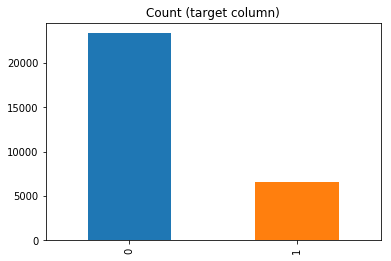

In [116]:

target_count = Credit['default_nextMTH'].value_counts()
print('No default in next month:', target_count[0])
print('Default in next month:', target_count[1])
print('Proportion of default cases in the dataset:', round(target_count[1] / target_count[0], 2), ': 1')

target_count.plot(kind='bar', title='Count (target column)');


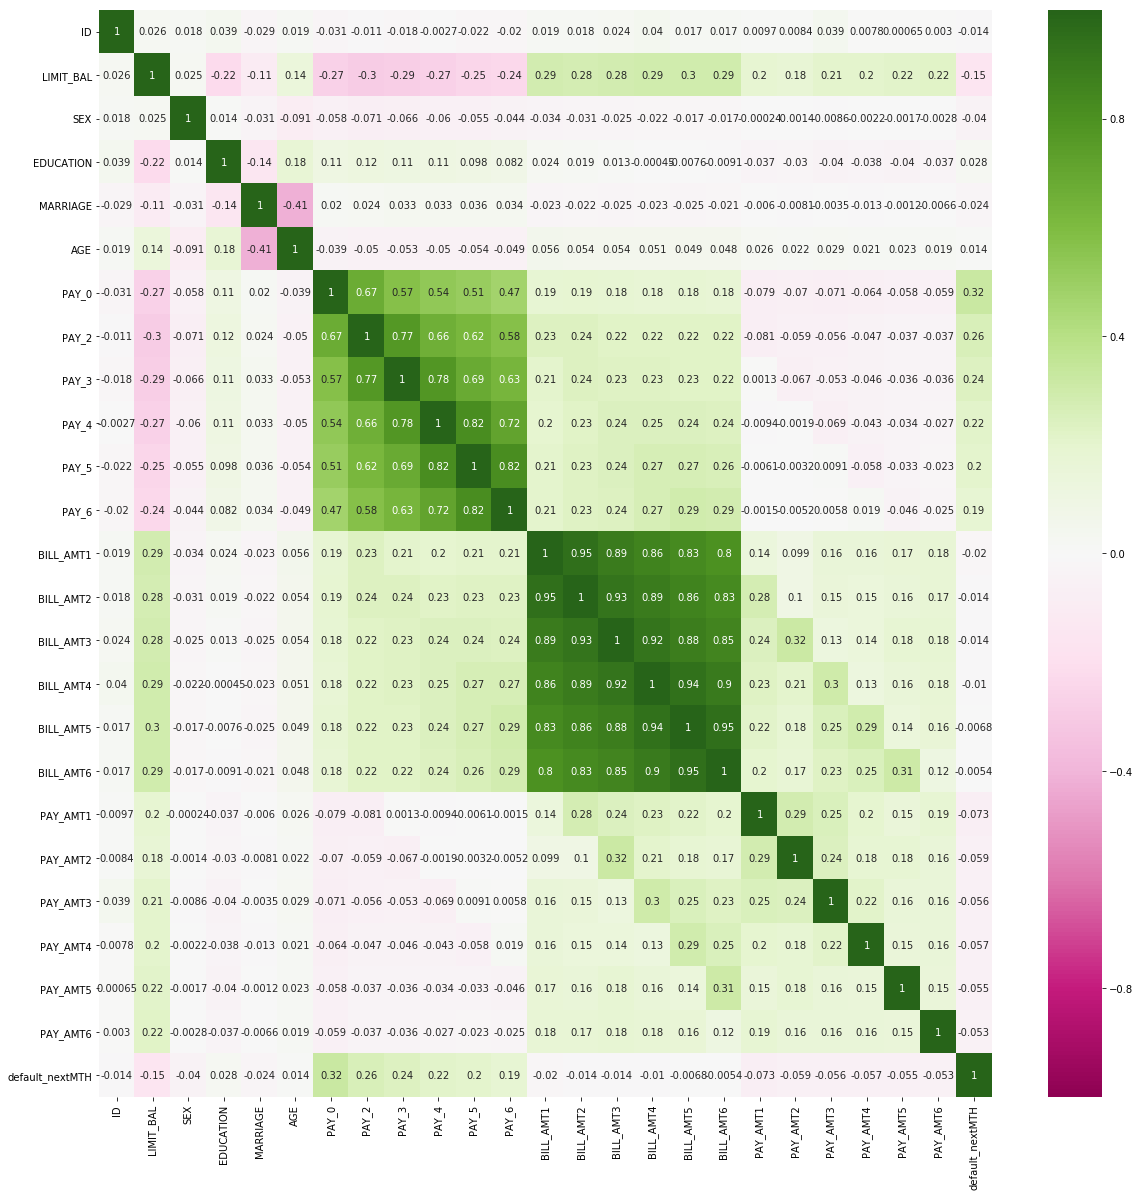

In [117]:
plt.subplots(figsize=(20,20))
sns.heatmap(Credit.corr(),  annot=True, vmin=-1, vmax= 1, cmap='PiYG', center= 0)

From the heatmap above, BILL_AMT1 to BILL_AMT6 are highly correlated within themselves. Since BILL_AMT1 is the 
latest billing month before default occured, I will drop out BILL_AMT2 to BILL_AMT6. In addition, ID and AGE features will 
also be removed since it doesn't mean anything in predicting the default occurence and lower correlated to the target.

In [118]:
Credit.drop(['ID','AGE','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis = 1, inplace = True)

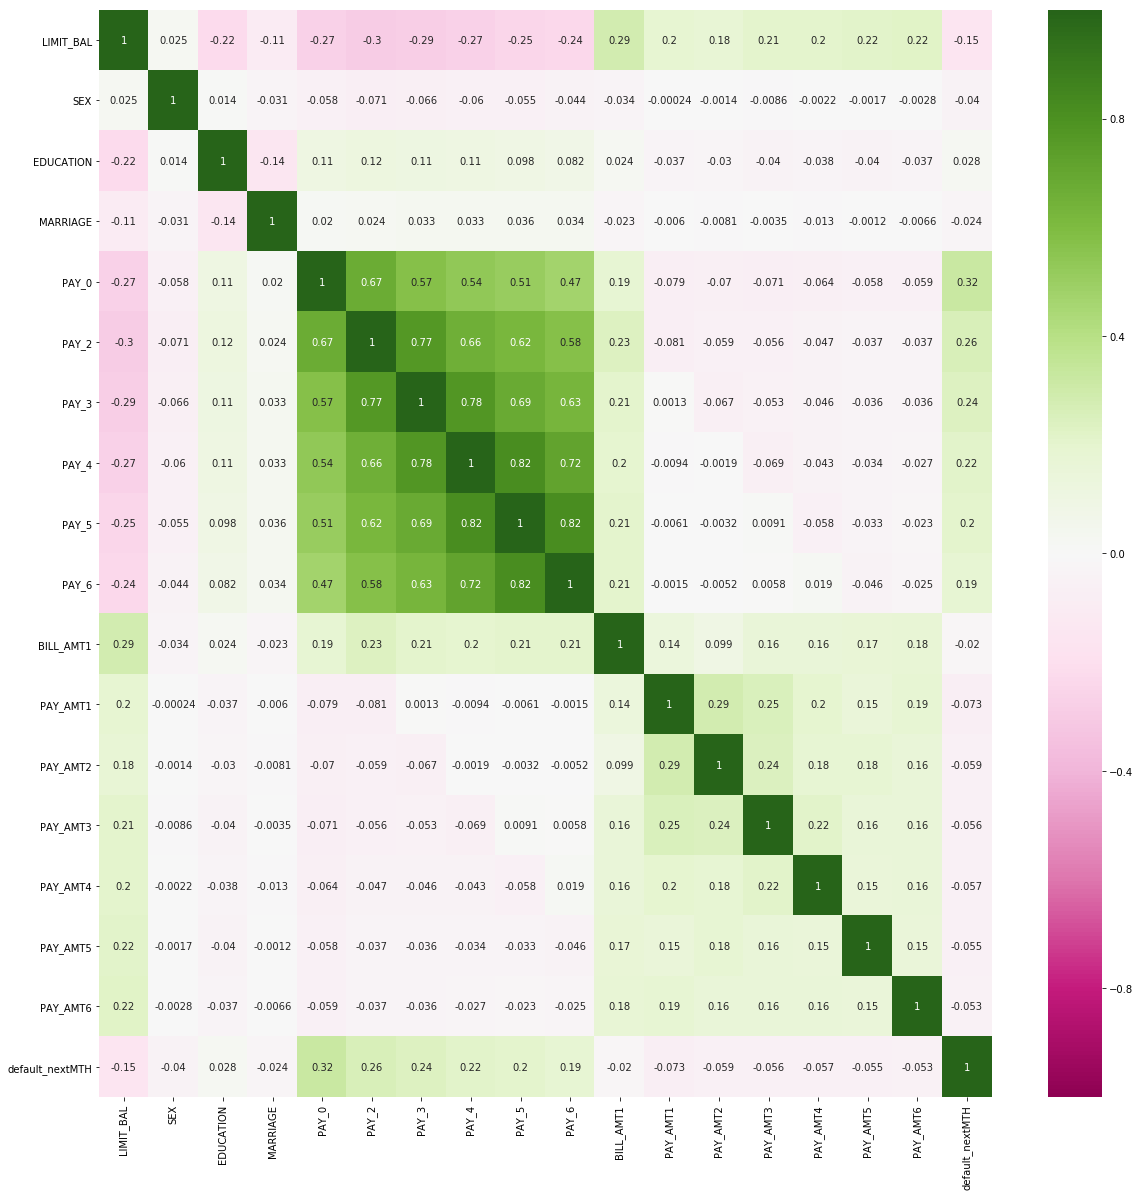

In [119]:
plt.subplots(figsize=(20,20))
sns.heatmap(Credit.corr(),  annot=True, vmin=-1, vmax= 1, cmap='PiYG', center= 0)

In [120]:
count_d = 0
count_nd = 0

for i in Credit['default_nextMTH']:
    if i == 1:
        count_d += 1
    else:
        count_nd += 1
    
total= count_d + count_nd
print("Total cases under study", total)
print("Total default cases", count_d,"or ", round(count_d/total,2)*100,"%" )
print("Total non-default cases", count_nd,"or ", round(count_nd/total,2)*100,"%" )

Total cases under study 30000
Total default cases 6636 or  22.0 %
Total non-default cases 23364 or  78.0 %


In [121]:
# The remaining features have 18 columns
Credit.shape

(30000, 18)

In [122]:
Credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_nextMTH
0,20000.0,2,2,1,2,2,-1,-1,-2,-2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,-1,2,0,0,0,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,-1,0,-1,0,0,0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [123]:
# SEX: Gender (1=male, 2=female), the data set in SEX column only has either male or female
Credit['SEX'].value_counts().sort_index()

1    11888
2    18112
Name: SEX, dtype: int64

In [124]:
SEX_dummies= pd.get_dummies(Credit.SEX, prefix= 'SEX')
SEX_dummies.sample(n=5, random_state=1)

,SEX_1,SEX_2
10747,1,0
12573,0,1
29676,1,0
8856,0,1
21098,1,0


In [125]:
# Drop SEX_2 since one column is enough to represent the two genders

SEX_dummies.drop(SEX_dummies.columns[-1], axis=1, inplace= True)
SEX_dummies.head()

,SEX_1
0,0
1,0
2,0
3,0
4,1


In [126]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# value counts shows there is redundant categories under EDUCATION column i.e. categories 0, and 6
Credit['EDUCATION'].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [127]:
# to replace the category 0 with NA

Credit.EDUCATION.replace(0, np.nan, inplace=True)
Credit.isna().sum()

LIMIT_BAL           0
SEX                 0
EDUCATION          14
MARRIAGE            0
PAY_0               0
PAY_2               0
PAY_3               0
PAY_4               0
PAY_5               0
PAY_6               0
BILL_AMT1           0
PAY_AMT1            0
PAY_AMT2            0
PAY_AMT3            0
PAY_AMT4            0
PAY_AMT5            0
PAY_AMT6            0
default_nextMTH     0
dtype: int64

In [128]:
# Check the column MARRIAGE after replacing the extra category 0 with NA

Credit['EDUCATION'].value_counts().sort_index()

1.0    10585
2.0    14030
3.0     4917
4.0      123
5.0      280
6.0       51
Name: EDUCATION, dtype: int64

In [129]:
# Create EDUCATION DUMMY COLUMNS

EDUCATION_dummies= pd.get_dummies(Credit.EDUCATION, prefix= 'EDUCATION')
EDUCATION_dummies.sample(n=5, random_state=1)

,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0
10747,0,0,1,0,0,0
12573,0,0,1,0,0,0
29676,0,1,0,0,0,0
8856,0,0,1,0,0,0
21098,1,0,0,0,0,0


In [130]:
# Drop EDUCATION_0 & EDUCATION_6, columns with unknown
# Drop EDUCATION_5 since EDUCATION 1, 2, 3, and 4 columns are enough to represent all categories of EDUCATION

EDUCATION_dummies.drop(['EDUCATION_5.0','EDUCATION_6.0'], axis=1, inplace= True)
EDUCATION_dummies.head()

,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [131]:
# MARRIAGE: Marital status (1=married, 2=single, 3=others)
# value counts shows there is redundant categories under MARRIAGE column i.e. categories 0

Credit['MARRIAGE'].value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [132]:
# to replace the category 0 with NA

Credit.MARRIAGE.replace(0, np.nan, inplace=True)
Credit.isna().sum()

LIMIT_BAL           0
SEX                 0
EDUCATION          14
MARRIAGE           54
PAY_0               0
PAY_2               0
PAY_3               0
PAY_4               0
PAY_5               0
PAY_6               0
BILL_AMT1           0
PAY_AMT1            0
PAY_AMT2            0
PAY_AMT3            0
PAY_AMT4            0
PAY_AMT5            0
PAY_AMT6            0
default_nextMTH     0
dtype: int64

In [133]:
# Check the column MARRIAGE after replacing the extra category 0 with NA

Credit['MARRIAGE'].value_counts().sort_index()

1.0    13659
2.0    15964
3.0      323
Name: MARRIAGE, dtype: int64

In [134]:
MARRIAGE_dummies= pd.get_dummies(Credit.MARRIAGE, prefix= 'MARRIAGE')
MARRIAGE_dummies.sample(n=5, random_state=1)

,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0
10747,1,0,0
12573,1,0,0
29676,1,0,0
8856,1,0,0
21098,0,1,0


In [135]:
# Drop MARRIAGE_3 since MARRIAGE 1 and 2 are enough to represent all categories of EDUCATION

MARRIAGE_dummies.drop(MARRIAGE_dummies.columns[-1], axis=1, inplace= True)
MARRIAGE_dummies.head()

,MARRIAGE_1.0,MARRIAGE_2.0
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [136]:
# Concatenate the data set, Credit with three sets of dummies created namely SEX, EDUCATION and MARRIAGE

Credit_dummies = pd.concat([Credit, SEX_dummies, EDUCATION_dummies, MARRIAGE_dummies], axis=1)

Credit_dummies.shape

(30000, 25)

In [137]:
# Remove the rows with NA intentionally created for extra categories found in columns, EDUCATION AND MARRIAGAE

Credit_dummies.dropna(inplace=True)

In [138]:
# Check if the dataset Credit_dummies dummies are clear from cell with NA

Credit_dummies.isna().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
SEX_1              0
EDUCATION_1.0      0
EDUCATION_2.0      0
EDUCATION_3.0      0
EDUCATION_4.0      0
MARRIAGE_1.0       0
MARRIAGE_2.0       0
dtype: int64

In [139]:
# the latest shape of data set Credit_dummies has lower number of rows at 29932

Credit_dummies.shape

(29932, 25)

In [140]:
# Remove the original columns of SEX, EDUCATION and MARRIAGE

Credit_dummies.drop(['SEX','EDUCATION','MARRIAGE'], axis = 1, inplace = True)

In [141]:
# Shift the target column ('default_nextMTH') to the last column

y= Credit_dummies.default_nextMTH
Credit_dummies.drop(['default_nextMTH'], axis=1, inplace= True)
Credit_dummies= pd.concat([Credit_dummies, y], axis=1)

In [142]:
# Show the columns in data set named as Credit_dummies

Credit_dummies.columns

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'SEX_1', 'EDUCATION_1.0', 'EDUCATION_2.0', 'EDUCATION_3.0',
       'EDUCATION_4.0', 'MARRIAGE_1.0', 'MARRIAGE_2.0', 'default_nextMTH'],
      dtype='object')

In [143]:
# Check the shape of Credit_dummies after removing the three original columns of SEX, EDUCATION AND MARRIAGE

Credit_dummies.shape

(29932, 22)

In [144]:
# Create feature matrix (X)
feature_cols= Credit_dummies.columns.drop(['default_nextMTH'])
X= Credit_dummies[feature_cols]

# Create response vector (y)

y= Credit_dummies.default_nextMTH

In [145]:
print((type(X)))
print((type(X.values)))
print((type(y)))
print((type(y.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [146]:
print((X.shape))
print((y.shape))

(29932, 21)
(29932,)


In [147]:
# check if Credit_dummies contain any NA cell

Credit_dummies.isna().sum()

LIMIT_BAL          0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
SEX_1              0
EDUCATION_1.0      0
EDUCATION_2.0      0
EDUCATION_3.0      0
EDUCATION_4.0      0
MARRIAGE_1.0       0
MARRIAGE_2.0       0
default_nextMTH    0
dtype: int64

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pred = scaler.fit_transform(X)

Split data set for Train and Test sets using Logistic Regression and check their accuracies

In [149]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print('Testing score: '  + str(logreg.score(X_test, y_test)))
print('Training score: '  + str(logreg.score(X_train, y_train)))

Testing score: 0.7815047440865963
Training score: 0.7774511114080805


The Training and Testing scores are almost equal to the mix (78%) of none default cases in the data set. 

In [150]:
print(logreg.intercept_)
print(logreg.coef_)
coeff = pd.DataFrame(dict(zip(X.columns,model.coef_[0])),index=[0])
coeff

[-3.96367037e-08]
[[-5.47746144e-06  8.93562845e-08  7.19795673e-08  6.68494763e-08
   6.38936164e-08  6.22160956e-08  5.99718706e-08  1.06980608e-06
  -2.48111388e-05 -1.97145876e-05 -1.14323384e-05 -7.87454872e-06
  -3.44798717e-06 -4.05374625e-06 -1.16204268e-08 -8.42674575e-09
  -2.08277600e-08 -8.18250041e-09 -4.57448283e-10 -8.02342842e-09
  -3.09205441e-08]]


,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_1.0,MARRIAGE_2.0
0,-0.000005,8.935628e-08,7.197957e-08,6.684948e-08,6.389362e-08,6.221610e-08,5.997187e-08,0.000001,-0.000025,-0.00002,...,-0.000008,-0.000003,-0.000004,-1.162043e-08,-8.426746e-09,-2.082776e-08,-8.182500e-09,-4.574483e-10,-8.023428e-09,-3.092054e-08


The coefficient figures do not show any particular feature having significant importance, in other words, the features are having similar but very little weights on the target column. 

This is typically so when the features and target column do not have linear relationship yet created by logistic 
regression that assumes features and target are linearly related.

In [151]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [152]:
list1 = ["Actual: No", "Actual: Yes"]
list2 = ["Predicted: No", "Predicted: Yes"]
pd.DataFrame(cm, list1,list2)

,Predicted: No,Predicted: Yes
Actual: No,5848,0
Actual: Yes,1635,0


In [153]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88      5848
          1       0.00      0.00      0.00      1635

avg / total       0.61      0.78      0.69      7483



/Users/kaiengwee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The classification report simply shows the model prediction is only as good as predicting non-default cases 
at base accuracy of 78%. 

We need to use Smote Tomek to improve from data imbalanced.

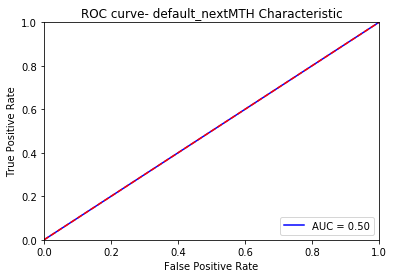

In [154]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC curve- default_nextMTH Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Though the logistic regression classifier score is 78%, the AUC score is 0.50.

That means the classifier is not able to predict test data but only repeat the outcome in the actual data set that has 78% of data imbalanced.

Using another sklearn linear model to train and test the model

In [155]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.25, random_state=46)
logit_simple = linear_model.LogisticRegression(C=1e9).fit(X_train, y_train)

In [156]:
1- y_train.mean()

0.7784311105171723

In [157]:
# What is our accuracy on the test set?
print(np.mean(y_test == logit_simple.predict(X_test)))

0.7785647467593211


In [158]:
# Get probability predictions.
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]

In [159]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)

array([[5826,    0],
       [1657,    0]])

This sklearn linear model is built on logistic regression and hence, is showing the similar accuracy at about 78%

Use Decision Tree Classifier to build the model

In [160]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=123, max_depth=7)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model= DT.fit(X_train, y_train) 

y_pred= DT.predict(X_test)

print('Testing score: ', DT.score(X_test, y_test))
print('Training score: ', DT.score(X_train, y_train))

Testing score:  0.8276092476279567
Training score:  0.8263174306205177


In [161]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.96      0.90      5848
          1       0.71      0.36      0.48      1635

avg / total       0.81      0.83      0.81      7483



In [162]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [163]:
list1 = ["Actual: No", "Actual: Yes"]
list2 = ["Predicted: No", "Predicted: Yes"]
pd.DataFrame(cm, list1,list2)

,Predicted: No,Predicted: Yes
Actual: No,5603,245
Actual: Yes,1045,590


This Decision Tree Classifier has a testing score of about 83%, however, the model performs poorly at 36% in identifying correctly over all default cases.

In addition, the more costly Type II error is 22% which means the model is unable to predict test data more accurately after training.

Apply Random Forest Classifier to get model accuracy

In [164]:
from sklearn.ensemble import RandomForestClassifier

# Train model
Random = RandomForestClassifier(n_estimators=10, max_depth= 10)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model= Random.fit(X_train,y_train)
 
# Predict on training set
y_pred = Random.predict(X_test)
 
print('Testing score: ' + str(Random.score(X_test, y_test)))
print('Training score: '  + str(Random.score(X_train, y_train)))
list(zip(feature_cols, Random.feature_importances_)) 

Testing score: 0.825203795269277
Training score: 0.8489465009577264


[('LIMIT_BAL', 0.04606003035137167),
 ('PAY_0', 0.25883204943579885),
 ('PAY_2', 0.12878462504445126),
 ('PAY_3', 0.06615994193827204),
 ('PAY_4', 0.07777274415598524),
 ('PAY_5', 0.04218697788506809),
 ('PAY_6', 0.022008777277566186),
 ('BILL_AMT1', 0.058620174112489806),
 ('PAY_AMT1', 0.05799449596094891),
 ('PAY_AMT2', 0.045394878278903296),
 ('PAY_AMT3', 0.03725070114473749),
 ('PAY_AMT4', 0.04114247200140499),
 ('PAY_AMT5', 0.03698194718789148),
 ('PAY_AMT6', 0.04190296444179459),
 ('SEX_1', 0.00788878408540682),
 ('EDUCATION_1.0', 0.006790587112067326),
 ('EDUCATION_2.0', 0.005008318826975535),
 ('EDUCATION_3.0', 0.00602478934964114),
 ('EDUCATION_4.0', 0.00055434000852006),
 ('MARRIAGE_1.0', 0.005846800190188651),
 ('MARRIAGE_2.0', 0.006793601210516591)]

The feature importance check shows

The most importance feature is PAY_0 which makes sense as this is the most recent bill payment that reveals the 
payment capability. 

The least important feature is EDUCATION category 4 which also makes sense as this is a minority category under
EDUCATION column.

Random forest can work better with categorical features, than logistic regression.

Check the test data set accuracy using roc auc curve after modeled by Random forest

In [165]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [166]:
list1 = ["Actual: No", "Actual: Yes"]
list2 = ["Predicted: No", "Predicted: Yes"]
pd.DataFrame(cm, list1,list2)

,Predicted: No,Predicted: Yes
Actual: No,5579,269
Actual: Yes,1039,596


In [167]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.95      0.90      5848
          1       0.69      0.36      0.48      1635

avg / total       0.81      0.83      0.80      7483



The Precision is good but the recall is very low for the minority Class 1 (default class) because the data set is imbalanced

Although the test set accuracy is 83% but only 37% defaulted cases are predicted correctly.

That also means this model is better in predicting non defaulted cases and not equally good in predicting default cases.

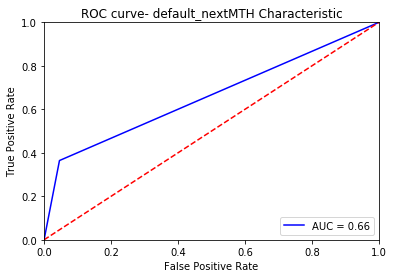

In [168]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC curve- default_nextMTH Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Though the Random Forest classifier score is 83%, the AUC score is 0.66. 

That means this model is better in predicting non defaulted cases but not equally good in predicting default cases because the data set has very high imbalanced data set at 78%.

Apply Smote Tomek on imbalanced dataset

Automatically created module for IPython interactive environment


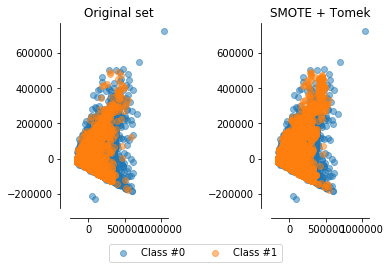

In [169]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.combine import SMOTETomek

print(__doc__)

X= Credit_dummies[feature_cols]
y= Credit_dummies.default_nextMTH

# Generate the dataset
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.22, 0.78],
                           #n_informative=3, n_redundant=1, flip_y=0,
                           #n_features=18, n_clusters_per_class=1,
                           #n_samples=30000, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components= 2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply SMOTE + Tomek links
sm = SMOTETomek()
X_resampled, y_resampled = sm.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=0.5)
ax2.set_title('SMOTE + Tomek')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    #ax.set_xlim([-6, 8])
    #ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()



In [170]:
# To check the level of imbalanced data set after Smote Tomek application:
# The results show the Smote Tomek function has actually increased the minority much more than reducing the majority 
# The Smote Tomek function has provided a balanced data set at 50:50

count_d = 0
count_nd = 0

for i in y_resampled:
    if i == 1:
        count_d += 1
    else:
        count_nd += 1
    
total= count_d + count_nd
print("Total cases under study", total)
print("Total default cases", count_d,"or ", round(count_d/total,2)*100,"%" )
print("Total non-default cases", count_nd,"or ", round(count_nd/total,2)*100,"%" )

Total cases under study 45172
Total default cases 22586 or  50.0 %
Total non-default cases 22586 or  50.0 %


In [171]:
# Create a new dataframe for all the columns after the Credit_dummies data set was treated by Smote Tomek 

X= pd.DataFrame(X_resampled)
y= pd.DataFrame(y_resampled)
Credit_ST= pd.concat([X, y], axis= 1)
Credit_ST.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,0
0,20000.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,0.0,689.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,120000.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,0.0,1000.0,...,0.0,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,1518.0,1500.0,...,1000.0,5000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,2000.0,2019.0,...,1069.0,1000.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,2000.0,36681.0,...,689.0,679.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [172]:
# Call out the headers of Credit_dummies to compare aginst the headers of X_resampled

Credit_dummies.head(1)

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,...,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_1.0,MARRIAGE_2.0,default_nextMTH
0,20000.0,2,2,-1,-1,-2,-2,3913.0,0.0,689.0,...,0.0,0.0,0,0,1,0,0,1,0,1


In [173]:
# Put headers of Credit_dummies.columns back onto X_resampled and y_resampled

initialcol = Credit_dummies.columns
Credit_ST.columns = initialcol

In [174]:
Credit_ST.head(1)

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,...,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_1.0,MARRIAGE_2.0,default_nextMTH
0,20000.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,0.0,689.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


In [175]:
# Create feature matrix X from the columns treated by Smote Tomek
feature_cols= Credit_ST.columns.drop(['default_nextMTH'])
X= Credit_ST[feature_cols]

# Create response vector (y)

y= Credit_ST.default_nextMTH

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pred = scaler.fit_transform(X)

The Credit_dummies data set has been treated by Smote Tomek. 
Now, the data set is renamed to Credit_ST.

Use Logistic Regression again to check the model accuracy

In [177]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print('Testing score: '  + str(logreg.score(X_test, y_test)))
print('Training score: '  + str(logreg.score(X_train, y_train))) 

Testing score: 0.5364385017267334
Training score: 0.5436110865137695


In [178]:
print(logreg.intercept_)
print(logreg.coef_)
coeff = pd.DataFrame(dict(zip(X.columns,model.coef_[0])),index=[0])
coeff

[0.00042638]
[[-9.28140973e-07  1.78231265e-03  1.36994658e-03  1.18599088e-03
   1.05203456e-03  9.30131425e-04  8.60574848e-04  3.32312167e-06
  -1.48868431e-05 -1.46763068e-05 -7.98861065e-06 -7.55339994e-06
  -4.49610652e-06 -4.76670861e-06  2.79237236e-04  6.31809580e-05
   2.70295998e-04  1.17722917e-04 -6.84993334e-06  2.85944279e-04
   1.29607106e-04]]


,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_1.0,MARRIAGE_2.0
0,-9.281410e-07,0.001782,0.00137,0.001186,0.001052,0.00093,0.000861,0.000003,-0.000015,-0.000015,...,-0.000008,-0.000004,-0.000005,0.000279,0.000063,0.00027,0.000118,-0.000007,0.000286,0.00013


The coefficient figures do not show any particular feature having significant importance, in other words, the features are having similar but very little weights on the target column. 

This is typically so when the features and target column do not have linear relationship which is the basis applied in 
logistic regresion.

The train and test scores at about 52% only shows slightly better accuracy than the 50:50 data set treated 
by Smote Tomek

In [179]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [180]:
list1 = ["Actual: No", "Actual: Yes"]
list2 = ["Predicted: No", "Predicted: Yes"]
pd.DataFrame(cm, list1,list2)

,Predicted: No,Predicted: Yes
Actual: No,4593,986
Actual: Yes,4249,1465


In [181]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.52      0.82      0.64      5579
          1       0.60      0.26      0.36      5714

avg / total       0.56      0.54      0.50     11293



The Precision and the recall are having similar scores due to balanced data set after treated by Smote Tomek. 

However, the accuray is only slightly more accurate than the base accuracy (50%) of the data set Credit_ST.

The model has poor predicting power on non default and default cases.

The low accuracy suggested the logistic regression classifier is not ideal for this type of highly
categorical data set.

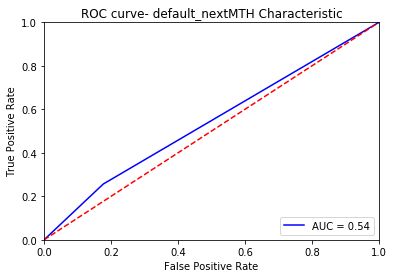

In [182]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC curve- default_nextMTH Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The Logistic classifier and the AUC scores are 53%. 

That means this model is as good as guessing in predicting non defaulted and default cases.

Use another sklearn linear model to train and test the model

In [183]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.25, random_state=46)
logit_simple = linear_model.LogisticRegression(C=1e9).fit(X_train, y_train)

In [184]:
1- y_train.mean()

0.5019628678532424

In [185]:
# What is our accuracy on the test set?
print(np.mean(y_test == logit_simple.predict(X_test)))

0.5233330381652351


In [186]:
# Get probability predictions.
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]

In [187]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)

array([[4586,  994],
       [4389, 1324]])

This sklearn linear model is built on logistic regression and hence, is showing the similar accuracy at about 52%

Use Decision Tree Classifier to build the test model

In [188]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=123, max_depth=9)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model= DT.fit(X_train, y_train) 

y_pred= DT.predict(X_test)

print('Testing score: '  + str(DT.score(X_test, y_test)))
print('Training score: '  + str(DT.score(X_train, y_train)))

Testing score: 0.8490215177543611
Training score: 0.8647244605803005


In [189]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [190]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.91      0.86      5579
          1       0.90      0.79      0.84      5714

avg / total       0.86      0.85      0.85     11293



In [191]:
list1 = ["Actual: No", "Actual: Yes"]
list2 = ["Predicted: No", "Predicted: Yes"]
pd.DataFrame(cm, list1,list2)

,Predicted: No,Predicted: Yes
Actual: No,5099,480
Actual: Yes,1225,4489


This Decision Tree Classifier has a testing score of about 84%, in addition, the model can now perform equally good in identifying non default and default correctly over all types of cases.

In addition, the more costly Type II error is 11% which means the model is able to predict test data more accurately after training.

Apply Random Forest Classifier to build test model

In [238]:
from sklearn.ensemble import RandomForestClassifier

# Train model
Random = RandomForestClassifier(n_estimators=12, max_depth= 12)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model= Random.fit(X_train,y_train)
 
# Predict on training set
y_pred = Random.predict(X_test)
 
 
print('Testing score: ' + str(Random.score(X_test, y_test)))
print('Training score: '  + str(Random.score(X_train, y_train)))
list(zip(feature_cols, Random.feature_importances_))  

Testing score: 0.8690339148144869
Training score: 0.9051034564184303


[('LIMIT_BAL', 0.023752638527247214),
 ('PAY_0', 0.18376802476019158),
 ('PAY_2', 0.1598055103492942),
 ('PAY_3', 0.03891021515284635),
 ('PAY_4', 0.023335306002177633),
 ('PAY_5', 0.030375055521654693),
 ('PAY_6', 0.03745392782903235),
 ('BILL_AMT1', 0.034544685353829395),
 ('PAY_AMT1', 0.03092320883323124),
 ('PAY_AMT2', 0.03080150457497362),
 ('PAY_AMT3', 0.020022919509194503),
 ('PAY_AMT4', 0.02069554552928925),
 ('PAY_AMT5', 0.017414934437914475),
 ('PAY_AMT6', 0.017803295501464235),
 ('SEX_1', 0.07187383523963968),
 ('EDUCATION_1.0', 0.03594669531310508),
 ('EDUCATION_2.0', 0.0515912986983452),
 ('EDUCATION_3.0', 0.02345372680394324),
 ('EDUCATION_4.0', 0.00031998261185226423),
 ('MARRIAGE_1.0', 0.08300023930022445),
 ('MARRIAGE_2.0', 0.06420745015054938)]

The feature importance check shows 

The most importance features are PAY_0 and PAY_2 which make sense as these are the most recent bill payments that reveal the payment capability. 

The least important feature is EDUCATION category 4 which also makes sense as this is a minority category under 
EDUCATION column. 

Random forest classifier score is as high as 87% and that means it can work better with categorical features, than logistic regression.

Check the test data set accuracy using confusion matric

In [194]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [195]:
list1 = ["Actual: No", "Actual: Yes"]
list2 = ["Predicted: No", "Predicted: Yes"]
pd.DataFrame(cm, list1,list2)

,Predicted: No,Predicted: Yes
Actual: No,5121,458
Actual: Yes,1038,4676


In [196]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.92      0.87      5579
          1       0.91      0.82      0.86      5714

avg / total       0.87      0.87      0.87     11293



The Precision and the recall are having similarly high scores due to more suitable Classifier applied on balanced data set after treated by Smote Tomek. 

The accuray is now much more accurate than the base accuracy (50%) of the data set Credit_ST.

The model created by Random Forest Classifier is now having very good predicting power on non default and default cases.

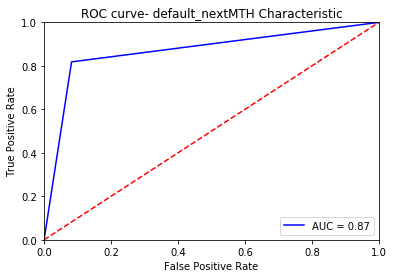

In [197]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC curve- default_nextMTH Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The Random Forest classifier and the AUC scores are 87%. That means this model is very good in predicting non defaulted and default cases equally.

The more costly Type II error is 9% which means the model is able to predict test data even more accurately after training. 

If we can pre-empt and avoid the default accounts from materialise, we will cut down the impairment ratio from 22%

If we can allow the non default accounts to increase more spending, we will be able to optimise earning.

If only 9% that will default inadvertently that is beyond the model predictability, this credit card portfolio impairment ratio should be brought from 22% to about 9% remarkably!

With the comparisons over different classifiers, we can confirm that Random Forest Classifier appear to be the best classifier in predicting non defaut and default cases in this case study.

Apply KNeighbors Classifier to build test model

In [216]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Calculate TRAINING ACCURACY and TESTING ACCURACY for K=1 through 100.

k_range = list(range(1, 101))
training_accuracy = []
testing_accuracy = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training accuracy 
    y_pred_class = knn.predict(X)
    training_accuracyy = metrics.accuracy_score(y, y_pred_class)
    training_accuracy.append(training_accuracyy)
    
    # Calculate testing accuracy.
    y_pred_class = knn.predict(X_test)
    testing_accuracyy = metrics.accuracy_score(y_test, y_pred_class)
    testing_accuracy.append(testing_accuracyy)

print('Testing score: '  + str(knn.score(X_test, y_test)))
print('Training score: '  + str(knn.score(X_train, y_train)))

Testing score: 0.6380943947578146
Training score: 0.6415183446973051


In [230]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Create a DataFrame of K, training accuracy, and testing accuracy.
column_dict = {'K': k_range, 'training accuracy':training_accuracy, 'testing accuracy':testing_accuracy}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df

,training accuracy,testing accuracy
K,,
100,0.640662,0.638094
99,0.639445,0.638360
98,0.640994,0.638980
97,0.639998,0.638271
96,0.641725,0.639954
95,0.640773,0.638626
94,0.642301,0.640043
93,0.640507,0.638980
92,0.641946,0.639157


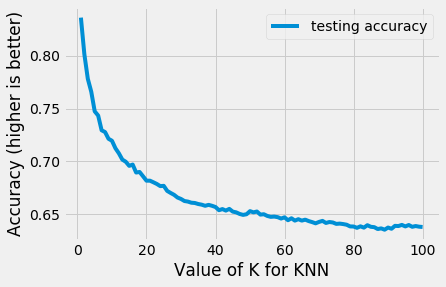

In [231]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing accuracy');
plt.xlabel('Value of K for KNN');
plt.ylabel('Accuracy (higher is better)');

In [232]:
# Find the minimum testing accuracy and the associated K value.
df.sort_values('testing accuracy').head()

,training accuracy,testing accuracy
K,,
89,0.641968,0.635526
87,0.642699,0.636146
91,0.640884,0.636412
88,0.643917,0.636766
81,0.644802,0.637297


In [233]:
# Find the maximum testing accuracy and the associated K value.
df.sort_values('testing accuracy').tail()

,training accuracy,testing accuracy
K,,
5,0.813469,0.747366
4,0.849354,0.765873
3,0.859493,0.778093
2,0.923515,0.801293
1,0.955636,0.835916


In [235]:
# Alternative method:
max(list(zip(training_accuracy, testing_accuracy,k_range)))

(0.955636234835739, 0.8359160541928629, 1)

The highest testing accuracy obtained from KNN Classifier is 0.836 when K = 1, however, this score is much lower than the training score of 0.956. That means the model is over-fitted.

The next K numbers without overfitting issue is when K = 5. Testing score is 75%, Training score is 81%. 

Since the testing score is still lower than 87% obtained from Random Forest Classifier, we will stick to use Random Forest Classifier model.


Please ignore SVC classifier below. It is only in research stage and has nothing to do with this case study submission. 

In [1525]:
import numpy as np

from sklearn.svm import SVC

svc = SVC(gamma='auto', random_state=123)
SVC(C=1.0, cache_size=20, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=123, shrinking=True,
    tol=0.001, verbose=False)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model= svc.fit(X_train, y_train) 

y_pred= svc.predict(X_test)

print('Testing score: '  + str(svc.score(X_test, y_test)))
print('Training score: '  + str(svc.score(X_train, y_train)))


Testing score: 0.5214577052668913
Training score: 0.9905119413572949
